# Example 3. Hand-made Adaptive Linear Neuron (Adaline) Gradian Decent
------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import * 

---
### Load and setup data/variables 
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df)

In [2]:
df0 = pd.read_csv('iris.data', header=None)[:100] # Keep data from 0-99
df0.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
df0.tail()

,sepal_length,x_1,petal_length,x_3,type
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [3]:
# Optional : Shuffle (fix the seed) order of data, list last 10 rows
np.random.seed(4) # welcome to play arround the number to observe
df = df0.reindex(np.random.permutation(df0.index))
df.iloc[90:]

,sepal_length,x_1,petal_length,x_3,type
98,5.1,2.5,3.0,1.1,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa


In [4]:
# Optional : Shuffle (fix the seed) order of data, list last 10 rows
np.random.seed(4) # welcome to play arround the number to observe
df = df0.reindex(np.random.permutation(df0.index))
df.iloc[90:]

,sepal_length,x_1,petal_length,x_3,type
98,5.1,2.5,3.0,1.1,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa


2\. Extract 100 data from dataframe df 
* No.4 colume to y
* No.0 & 2 columes to be X, with 2-D variables

In [5]:
# Filling y and X
y = df.iloc[:, 4].values
X = df.iloc[:, [0,2]].values
#print ("y :", y)
#print ("X :", X)

3\. Change the text to distigushable real rumber in y

In [6]:
y = np.where(y == 'Iris-setosa', -1, 1)

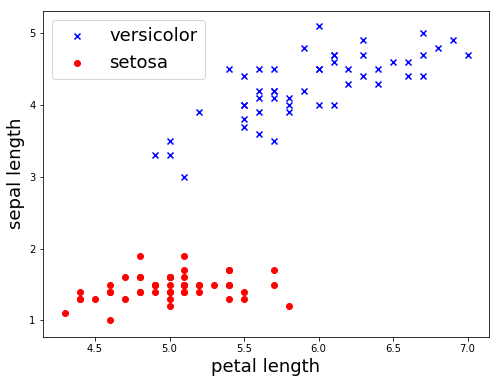

In [7]:
# Ploting : significance variables
plt.figure(figsize=(8, 6))
plt.scatter(X[ y == 1, 0], X[ y == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[ y ==-1, 0], X[ y ==-1, 1], color='red',  marker='o', label='setosa')
plt.xlabel('petal length', fontsize=18)
plt.ylabel('sepal length', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

---
### Run hand-made Adaline gradian decent
1\. Import hand-made Adaline gradian decent class

In [8]:
from AdalineGD import AdalineGD

2\. Show the effect of learing rate (eta)
   * Create a figure & 2 subplots
   * Train data with eta = 0.01 & 0.001 

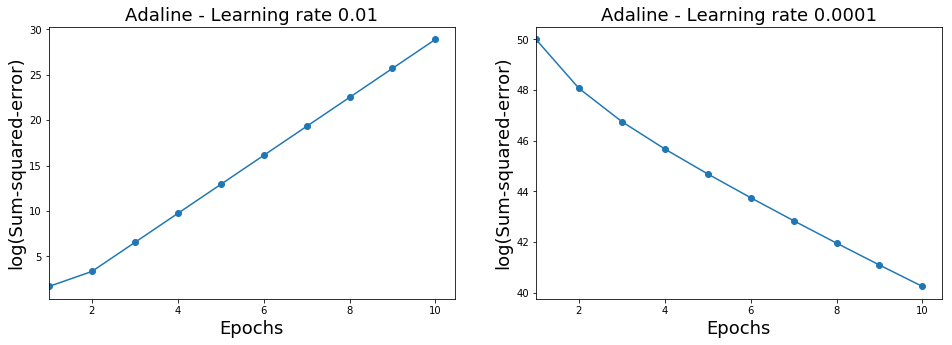

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs', fontsize=18)
ax[0].set_ylabel('log(Sum-squared-error)', fontsize=18)
ax[0].set_title('Adaline - Learning rate 0.01', fontsize=18)
ax[0].set_xlim(xmin=1)

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs', fontsize=18)
ax[1].set_ylabel('log(Sum-squared-error)', fontsize=18)
ax[1].set_title('Adaline - Learning rate 0.0001', fontsize=18)
ax[1].set_xlim(xmin=1)
plt.show()

### Conclusion
* The eta can affect the learning performance. 0.01 is too big to find the best solution and gets large errors, since it overshoot the global minimum of cost function. But 0.0001 needs more iteration to find the minimum, since it is too small.<br />
* On the other hand, since this is *batch learning*, i.e. only updating weights after going through all data, the results are the same between with and without suffleing dataframe.<br /> 
* However, this learning model is using the true values instead of using sign of predicted number, the strength of each variable are relevent to the results, so we have to used *standarlized* data before training, see next section :-)

---
## Using standarized data
1. Standarized data
2. Print the final w 
3. Sum-squared-errors V.S w_i -> find the minimum (1D and 2D(w_i,w_j))